   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


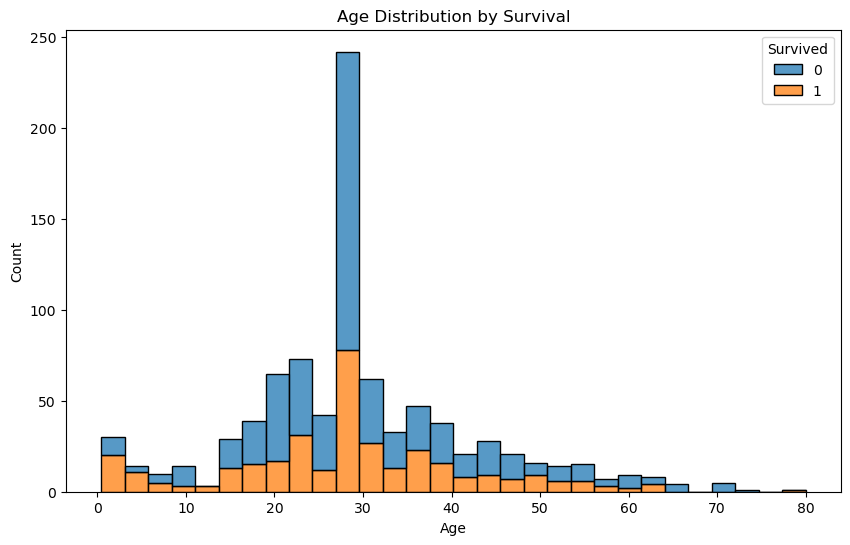

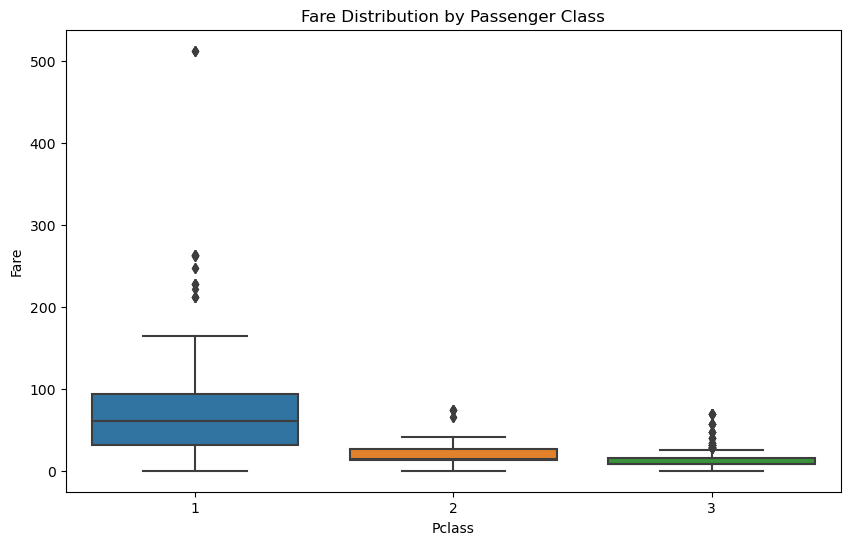

Model Accuracy: 0.7430

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       105
           1       0.78      0.53      0.63        74

    accuracy                           0.74       179
   macro avg       0.75      0.71      0.72       179
weighted avg       0.75      0.74      0.73       179


Feature Importance:
      feature  importance
0      Pclass    0.828268
3  FamilySize    0.063214
1         Age    0.031392
2        Fare    0.004970

Data Science Project Completed!
This project demonstrated data loading, exploration, preprocessing,
visualization, model training, and evaluation using the Titanic dataset.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load a sample dataset (you can replace this with your own data)
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Data exploration
print(data.head())
print(data.info())

# Data preprocessing
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Feature engineering
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Fare Distribution by Passenger Class')
plt.show()

# Prepare data for modeling
X = data[['Pclass', 'Age', 'Fare', 'FamilySize']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Conclusion
print("\nData Science Project Completed!")
print("This project demonstrated data loading, exploration, preprocessing,")
print("visualization, model training, and evaluation using the Titanic dataset.")